In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header=0,
    sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

## Calculating Request_Closing_Time in terms of hrs

In [5]:
def prepareData(df):
    df['Request_Closing_Time'] = ((df['Closed Date'] - df['Created Date']).dt.seconds/60)/60
    df_clean=df[df['Request_Closing_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    return df_perfect

In [6]:
df_perfect=prepareData(df)

#### Most Common Complain in NYC

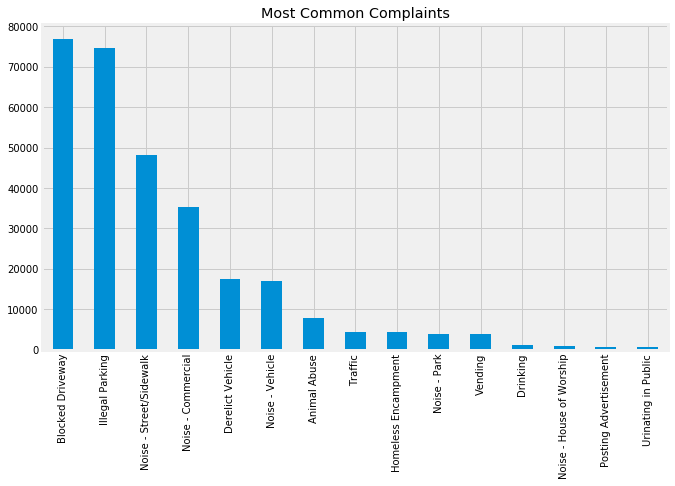

In [7]:
(df_perfect['Complaint Type'].value_counts()).head(15).plot(kind='bar',figsize=(10,6),title="Most Common Complaints")

## Least frequent complain in NYC

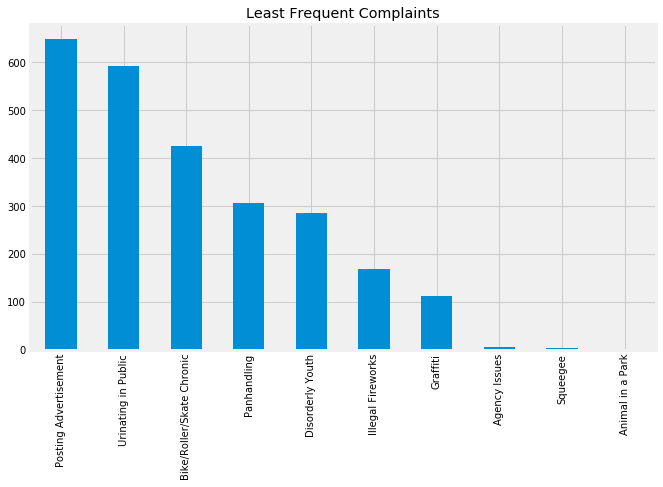

In [8]:
(df_perfect['Complaint Type'].value_counts()).tail(10).plot(kind='bar',figsize=(10,6),title="Least Frequent Complaints")

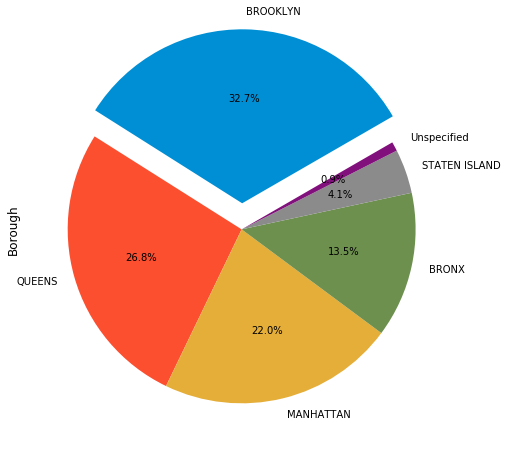

In [9]:
df['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.15,0,0,0,0,0),startangle=30,figsize=(10,8))

#### AS we see from above pie chart the most of the complain are requested from the Brooklyn

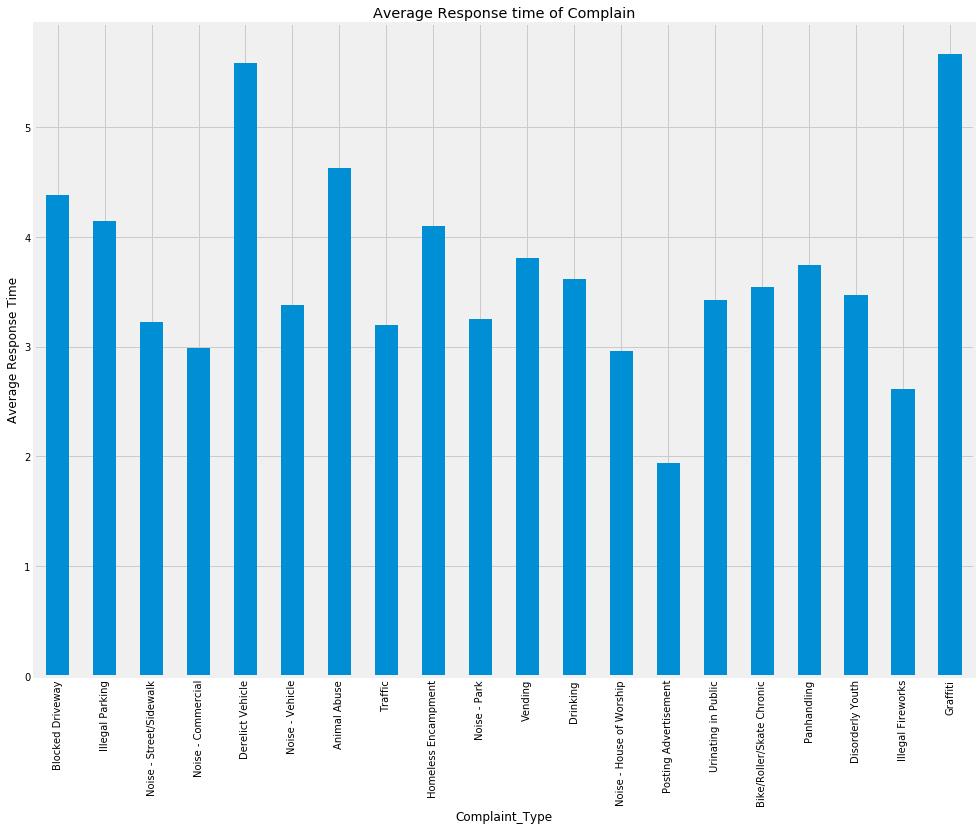

In [12]:
var = df_perfect.groupby('Complaint Type').Request_Closing_Time.mean()
frequent = df_perfect['Complaint Type'].value_counts()
var = var.ix[frequent.index]
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Average Response time of Complain")
var.head(20).plot(kind='bar')

##### Here we can see that the Derlict Vechicle and Graffiti complain take a long response time

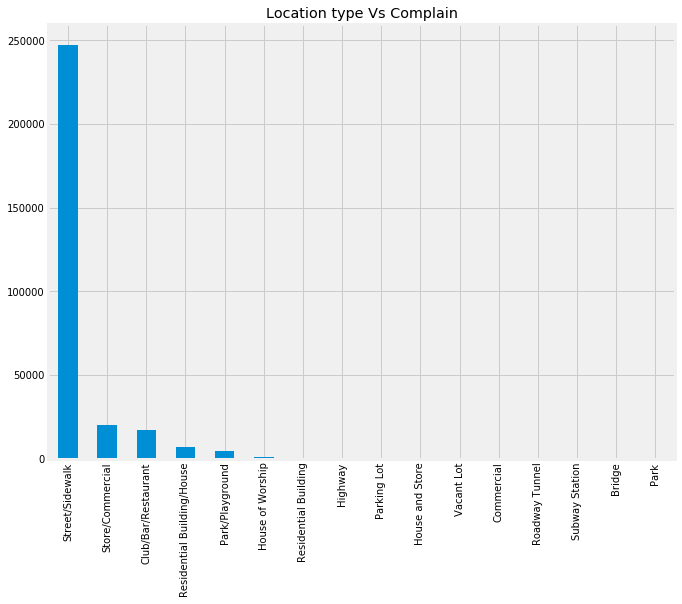

In [13]:
df_perfect['Location Type'].value_counts().plot(kind='bar',figsize=(10,8),title='Location type Vs Complain')

#### Here we can see that the most of the complian are registered from the Street/Sidewalk 

In [14]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [15]:
groupedby_complainttype= df_perfect.sort_values(['Request_Closing_Time']).groupby(['Location Type','Complaint Type'])['Request_Closing_Time'].mean()

In [16]:
dataFrameByLocationType = pd.DataFrame(groupedby_complainttype)

In [17]:
dataFrameByLocationType

Request_Closing_Time
Location Type              Complaint Type                                 
Bridge                     Homeless Encampment                    3.819306
Club/Bar/Restaurant        Drinking                               4.019785
                           Noise - Commercial                     2.891485
                           Urinating in Public                    4.491429
Commercial                 Animal Abuse                           4.568575
Highway                    Derelict Vehicle                       4.503397
                           Homeless Encampment                    3.271167
                           Traffic                                3.318645
House and Store            Animal Abuse                           4.497133
House of Worship           Noise - House of Worship               2.964212
Park                       Animal in a Park                       0.834722
Park/Playground            Animal Abuse                           3.309051
                           Drinking                               3.441329
                           Homeless Encampment                    3.787853
                           Illegal Fireworks                      5.003056
                           Noise - Park                           3.253813
                           Panhandling                            1.218657
                           Urinating in Public                    2.862493
                           Vending                                3.467124
Parking Lot                Animal Abuse                           4.449490
                           Posting Advertisement                  2.115754
Residential Building       Animal Abuse                           4.395258
Residential Building/House Animal Abuse                           4.851594
                           Bike/Roller/Skate Chronic              3.611300
                           Disorderly Youth                       3.854477
                           Drinking                               3.595236
                           Graffiti                               5.021657
                           Homeless Encampment                    4.582294
                           Illegal Fireworks                      3.099714
                           Panhandling                            5.165556
...                                                                    ...
Store/Commercial           Drinking                               3.252596
                           Graffiti                               5.560642
                           Homeless Encampment                    4.002980
                           Illegal Fireworks                      1.924167
                           Noise - Commercial                     3.082807
                           Panhandling                            4.346343
                           Posting Advertisement                  2.369167
                           Urinating in Public                    3.076107
                           Vending                                3.862727
Street/Sidewalk            Animal Abuse                           4.230670
                           Bike/Roller/Skate Chronic              3.558316
                           Blocked Driveway                       4.384645
                           Derelict Vehicle                       5.596804
                           Disorderly Youth                       3.354450
                           Drinking                               3.408614
                           Graffiti                               7.237522
                           Homeless Encampment                    3.965461
                           Illegal Fireworks                      2.349664
                           Illegal Parking                        4.142549
                           Noise - Street/Sidewalk                3.221731
                           Noise - Vehicle                        3.376236
    


• Whether the average response time across complaint types is similar or not (overall) <br/>
• Are the type of complaint or service requested and location related?


In [18]:
df_complain_and_average = df_perfect.groupby('Complaint Type').Request_Closing_Time.mean()

In [19]:
df_complain_and_average = pd.DataFrame(df_complain_and_average)

In [20]:
average_response_time = df_perfect['Request_Closing_Time'].mean()

In [21]:
average_response_time

3.929396621862539

In [22]:
df_perfect.shape

(298534, 53)

In [23]:
sample_data = df_perfect.sample(n=2000)

In [67]:
Hnull = "Response time accross the complain type is not similar"
Halt = "Response time accross the complain type is similar"

In [68]:
from scipy.stats import ttest_1samp

In [69]:
ttest,pvalue = ttest_1samp(sample_data['Request_Closing_Time'],average_response_time)

In [70]:
if pvalue<0.005:
    print("Reject the null hypothesis i.e",end=' ')
    print(Halt)
else:
    print("Accept the null hypothesis i.e",end=' ')
    print(Hnull)
    

Accept the null hypothesis i.e Response time accross the complain type is not similar


In [71]:
#Are the type of complaint or service requested and location related

In [72]:
Hnull="there is no reltation betweent the Complain and Location"
Halt = "there is relation between the compalin and location"

In [73]:
datatable = pd.crosstab(df_perfect['Complaint Type'],df_perfect['Location Type'])

In [74]:
datatable.head()

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,
Animal Abuse,0,0,62,0,93,0,0,122,110,227,5081,0,521,1527,22,0
Animal in a Park,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,25,0,53,346,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,76773,0,0
Derelict Vehicle,0,0,0,13,0,0,0,0,0,0,0,5,0,17485,0,77


In [75]:
observed_values = datatable.values

In [76]:
from scipy import stats

In [77]:
val = stats.chi2_contingency(datatable)

In [78]:
pvalue = val[1]

In [79]:
alpha = 0.05

In [80]:
if pvalue<alpha:
    print("Reject the null Hypothesis i.e ",end=' ')
    print(Halt)
else:
    print("Accept the null Hypothesis i.e",end=' ')
    print(Hnull)

Reject the null Hypothesis i.e  there is relation between the compalin and location
